In [1]:
# Automatically set base path to the project directory where the notebook is running
from pathlib import Path

# This gets the directory where the current notebook is located
base_path = Path.cwd()

print(f"📂 Base path automatically set to: {base_path}")

📂 Base path automatically set to: c:\GH\ASFPM-LLM-Data-Management-Workshop


# 📊 HDF5 Data Processing with Python and ChatGPT

Welcome to **HDF5 Data Processing**! In this session, we will use **ChatGPT**, **HDF5**, and **Python** to efficiently store, manipulate, and analyze large datasets.

### Enable the Table of Contents Sidebar in Jupyter Notebook  
For easier navigation:

1. Click on **View** in Jupyter Notebook.
2. Select **Left Sidebar** click **Show Table of Contents**.

## 📌 What You Will Learn
1. Set up your computer for **Python scripting** and **HDF5 file processing**.
2. Use **ChatGPT** to generate and debug **HDF5 queries**.
3. Learn best practices for **efficient data management** with HDF5.
4. Process and analyze **HDF5 datasets** using **Python and Numpy**.

## 🛠️ Required Programs
- **Python** (Version 3.12 or later)
- **HDF5 View** (Library for hierarchical data storage)
- **h5py** (Python library for working with HDF5 files)
- **Numpy** (For reading and analyzing HDF5 data)

---

## ▶️ Run the Test Cell  
Before we begin, run the test cell below to check your setup.

This test will:
- ✅ Verify that **HDF5 (h5py)** is available.
- ✅ Check if **Pandas** is installed.
- ✅ Confirm that an **HDF5 file can be created and accessed**.




In [2]:
# Checking HDF5 and Pandas Setup

print("🔍 Checking system setup...\n")

# Test h5py (HDF5 support)
try:
    import h5py
    with h5py.File("test.hdf5", "w") as f:
        f.create_dataset("test_data", data=[1, 2, 3, 4, 5])
    print("✅ HDF5 (h5py) is available and working!")
except Exception as e:
    print(f"❌ HDF5 test failed: {e}")

# Test Pandas
try:
    import pandas as pd
    print("✅ Pandas imported successfully!")
except ImportError:
    print("❌ Pandas is not installed. Run `pip install pandas`.")

# Confirm Python version
import sys
print(f"🐍 Python version: {sys.version.split()[0]}")

print("\n✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.")


🔍 Checking system setup...

✅ HDF5 (h5py) is available and working!
✅ Pandas imported successfully!
🐍 Python version: 3.12.9

✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.


# 📊 Using ChatGPT's Code Interpreter to Explore HDF5 Data Structure

## Purpose

Use ChatGPT to help you understand and analyze HDF5 data. Before performing any analysis, it's important to understand the file structure as a reference, so ChatGPT can handle the coding, syntax, and data types and you can focus on describing the actual task you want to complete, such as mapping wsel/velocity or calculating shear stress.

## ChatGPT Prompt for HDF Explorer Function

Prompt ChatGPT:

```
Write a function that will recursively explore an HDF File path.  List all attributes, groups, datasets, compound datasets and objects.  For each, list the full path, type, data types, dataset dataspace and datatype,to ensure a complete readout of all info needed to extract data from the HDF path.  The function should be robust, comprehensive and provide information for all different data types that might be present.

Use the provided TIMDEPNC.HDF5 and RAS_Muncie.p04.hdf to test the function by reading he following paths:


TIMDEPNC.HDF5: TIMDEP OUTPUT RESULTS/

RAS_Muncie.p04.hdf: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area

```
Provide the files and work with GPT until it achieves a desirable result.  

Then, ask for a script for local execution:

```
Provide a jupyter notebook cell for my local notebook.  The HDF files are located in the same folder as the notebook, under the "Data\Hdf5\" subfolder.  
```




![ChatGPT HDF Explorer](images/chatgpt-hdfexplorer.png)
[ChatGPT Conversation for HDF Exploration](https://chatgpt.com/share/67f1ad34-2f60-8010-8381-6f3d449aa812)

In [3]:
import h5py
import os

def explore_hdf5(filepath, target_path="/", indent=0):
    """
    Recursively explores an HDF5 file and prints information about each group, dataset, and attribute.

    Parameters:
    - filepath: str, path to the HDF5 file
    - target_path: str, internal path in the HDF5 file to start exploration
    - indent: int, current indentation level for pretty printing
    """
    def print_info(name, obj, level):
        spacing = ' ' * level
        full_path = obj.name
        obj_type = type(obj).__name__
        print(f"{spacing}Path: {full_path}")
        print(f"{spacing}Type: {obj_type}")

        if isinstance(obj, h5py.Dataset):
            print(f"{spacing} - Shape: {obj.shape}")
            print(f"{spacing} - Data type: {obj.dtype}")
            try:
                print(f"{spacing} - Dataspace (dims): {obj.shape}")
                print(f"{spacing} - Datatype (HDF5 native): {obj.id.get_type().get_class()}")
            except Exception as e:
                print(f"{spacing} - Error reading dataspace/datatype: {e}")
        elif isinstance(obj, h5py.Group):
            print(f"{spacing} - Contains: {len(obj)} items")

        # Print attributes
        if obj.attrs:
            print(f"{spacing} - Attributes:")
            for key, val in obj.attrs.items():
                print(f"{spacing}   * {key}: {val}")
        print("\n")

    with h5py.File(filepath, 'r') as file:
        def recursive_visit(group, level=0):
            for key in group:
                item = group[key]
                print_info(key, item, level)
                if isinstance(item, h5py.Group):
                    recursive_visit(item, level + 2)

        root = file[target_path]
        print_info(target_path, root, indent)
        if isinstance(root, h5py.Group):
            recursive_visit(root, indent + 2)



In [4]:
# Explore the specified paths (FLO2D)
flo2d_timdepnc_file = os.path.join("Data", "Hdf5", "TIMDEPNC.HDF5")
print("Exploring TIMDEPNC.HDF5:\n")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/")



Exploring TIMDEPNC.HDF5:

Path: /TIMDEP OUTPUT RESULTS
Type: Group
 - Contains: 14 items
 - Attributes:
   * Grouptype: [b'Generic']


  Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET
  Type: Group
   - Contains: 4 items
   - Attributes:
     * Data Type: [0]
     * DatasetCompression: [9]
     * DatasetUnits: [b'ft or m']
     * Grouptype: [b'DATASET SCALAR']
     * TimeUnits: [b'Hours']


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Maxs
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Mins
    Type: Dataset
     - Shape: (200,)
     - Data type: float32
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Times
    Type: Dataset
     - Shape: (200,)
     - Data type: float64
     - Dataspace (dims): (200,)
     - Datatype (HDF5 native): 1


    Path: /TIMDEP OUTPUT RESU

In [5]:
# Explore the specified paths (HEC-RAS 2D)
ras_file = os.path.join("Data", "Hdf5", "RAS_Muncie.p04.hdf")
print("\nExploring RAS_Muncie.p04.hdf:\n")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area")



Exploring RAS_Muncie.p04.hdf:

Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area
Type: Group
 - Contains: 5 items


  Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations
  Type: Group
   - Contains: 18 items


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Iteration Number
    Type: Dataset
     - Shape: (289, 1)
     - Data type: int32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF5 native): 0
     - Attributes:
       * Description: b'Sum of inner-loop iterations over all outer-loop iterations'


    Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Computations/Inner Max Volume Residual
    Type: Dataset
     - Shape: (289, 1)
     - Data type: float32
     - Dataspace (dims): (289, 1)
     - Datatype (HDF

-----

# User-Guided Data Exploration of HDF5 Files 

Now that we have a detailed description of the HDF's data contents, let's build functions to extract the data.  While this detailed information is no required, it is very helpful to reduce up-front errors and iterations.  To include this information in ChatGPT, just copy the cell output and paste into ChatGPT:   


Go to the previous output cell:  
![VS Code - Copy Cell Output](images/vscode-copycelloutput.png)  
Copy the Cell Output and paste into ChatGPT

-----

## Prompt for Extracting **FLO2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/TIMDEPNC.HDF5` in HDFView

- **Water Surface Elevation Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/`, containing water surface values for each grid element over time.
- **Depth Data**: Stored in TIMDEPNC.HDF5 a path `/TIMDEP OUTPUT RESULTS/FLOW DEPTH/`, containing depth values for each grid element over time.
- **Time Intervals**: Found in `TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times`, representing the time steps for the depth and velocity data.
- **X and Y Coordinates** Found in TIMDEPNC.HDF5, `/TIMDEP OUTPUT RESULTS/X-Coordinate/Values` and `/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`

Follow-up: 
`Provide a code cell for my local notebook.  The local path for the HDF5 file is Data/Hdf5/TIMDEPNC.HDF5`


1. Upload TIMDEPNC.HDF5 and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [6]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT

explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/")
explore_hdf5(flo2d_timdepnc_file, target_path="TIMDEP OUTPUT RESULTS/FLOW DEPTH/")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/X-Coordinate/Values")
explore_hdf5(flo2d_timdepnc_file, target_path="/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values")

Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION
Type: Group
 - Contains: 4 items
 - Attributes:
   * Data Type: [0]
   * DatasetCompression: [9]
   * DatasetUnits: [b'ft or m']
   * Grouptype: [b'DATASET SCALAR']
   * TimeUnits: [b'Hours']


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Maxs
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Mins
  Type: Dataset
   - Shape: (200,)
   - Data type: float32
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times
  Type: Dataset
   - Shape: (200,)
   - Data type: float64
   - Dataspace (dims): (200,)
   - Datatype (HDF5 native): 1


  Path: /TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values
  Type: Dataset
   - Shape: (200, 8588)
   - Data type: float32
   - Dataspace (dims): (200, 8588)
   - Datatype (HDF5 native): 1


Path: /TIMDE

If you don't see something similar to this output, adjust the prompt, provide corrections or try again!

![HDF-Flo2D WSE Map in ChatGPT](images/hdf-flo2d_wse_map.png)

Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step"`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

[ChatGPT Conversation - Flo2D HDF Data Extraction](https://chatgpt.com/share/67f29600-f218-8010-8a3e-42ea9300c60d)

Code Cells from these follow-up requests:

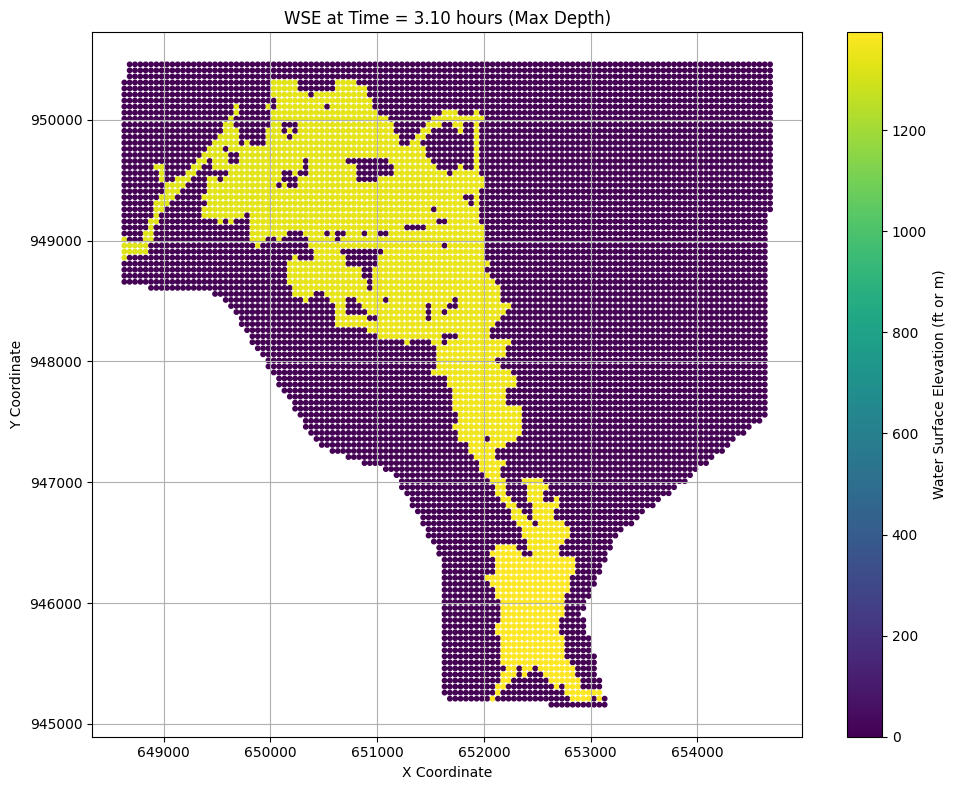

In [7]:
import h5py
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Set the local path to your HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"

# Open the HDF5 file
with h5py.File(hdf5_path, "r") as f:
    # Load flow depth values and compute the timestep with maximum total depth
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    max_depth_timestep = np.argmax(np.sum(depth_values, axis=1))

    # Load water surface elevation values and time
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]

    # Load X and Y coordinates
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Create an xarray DataArray for Water Surface Elevation
wse_xr_flo = xr.DataArray(
    data=wse_values,
    dims=["time", "element"],
    coords={"time": wse_times, "x": (["element"], x_coords), "y": (["element"], y_coords)},
    name="water_surface_elevation"
)

# Extract data for the time step with maximum depth
wse_at_max_depth = wse_xr_flo.sel(time=wse_times[max_depth_timestep])

# Plot the water surface elevation at the selected time
plt.figure(figsize=(10, 8))
plt.scatter(
    wse_at_max_depth['x'],
    wse_at_max_depth['y'],
    c=wse_at_max_depth.values,
    s=10,
    cmap='viridis'
)
plt.colorbar(label='Water Surface Elevation (ft or m)')
plt.title(f"WSE at Time = {wse_at_max_depth.time.item():.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


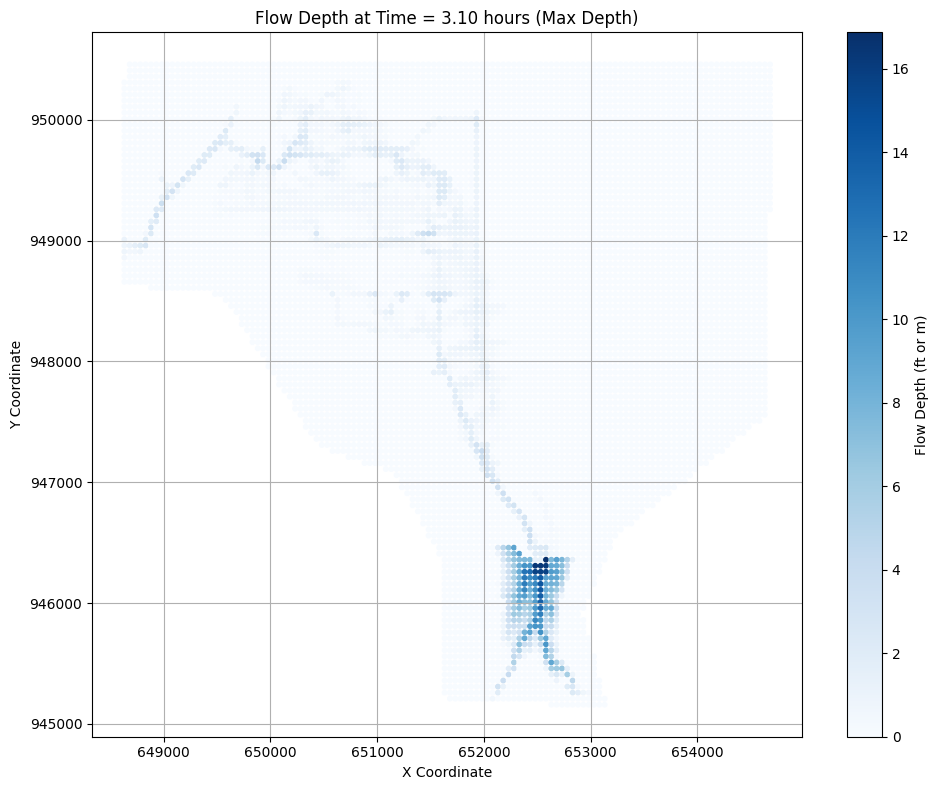

In [8]:
# Extract flow depth at the same time step (already found as max_depth_timestep)
with h5py.File(hdf5_path, "r") as f:
    depth_values = f["/TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

# Get depth data at max depth time step
depth_at_max_time = depth_values[max_depth_timestep, :]

# Plot the Flow Depth
plt.figure(figsize=(10, 8))
plt.scatter(
    x_coords,
    y_coords,
    c=depth_at_max_time,
    s=10,
    cmap='Blues'
)
plt.colorbar(label='Flow Depth (ft or m)')
plt.title(f"Flow Depth at Time = {wse_times[max_depth_timestep]:.2f} hours (Max Depth)")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install packages (run only once in your notebook)
!pip install xarray matplotlib imageio --quiet

### Imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm  # Optional: for progress bar
import os

### Load the HDF5 file
hdf5_path = "Data/Hdf5/TIMDEPNC.HDF5"
with h5py.File(hdf5_path, "r") as f:
    wse_values = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Values"][:]
    wse_times = f["/TIMDEP OUTPUT RESULTS/WATER SURFACE ELEVATION/Times"][:]
    x_coords = f["/TIMDEP OUTPUT RESULTS/X-Coordinate/Values"][:].flatten()
    y_coords = f["/TIMDEP OUTPUT RESULTS/Y-Coordinate/Values"][:].flatten()

### Create a folder to store frames
os.makedirs("frames", exist_ok=True)

### Generate and save each frame
filenames = []
for i in tqdm(range(len(wse_times))):
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, c=wse_values[i], s=10, cmap='viridis')
    plt.colorbar(label="Water Surface Elevation (ft or m)")
    plt.title(f"WSE at Time = {wse_times[i]:.2f} hrs")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()

    fname = f"frames/frame_{i:03d}.png"
    plt.savefig(fname)
    plt.close()
    filenames.append(fname)

### Create GIF
gif_path = "wse_animation_FLO2D.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### Clean up frames (optional)
for filename in filenames:
    os.remove(filename)

print(f"Animation saved as {gif_path}")

-----

## Prompt for Extracting **HEC-RAS 2D Water Surface Elevation Results**

Follow along by opening the file `Data/hdf5/RAS_Muncie.p04.hdf` in HDFView

- **Mesh Name Lookup**: 2D area names can be found in /Results/Unsteady/Geometry Info/2D Area(s).  Results are available for each 2D flow area, and the 2D area name is part of the path so it must be retrieved first (as a list).  In the example HDF file provided, flow_area_name is "2D Interior Area" (only one 2D area)

- **Mesh Cell Centers** can be found here: `/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate`
    
- **Time Date Stamp**: Time stamps are available at this path: `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp` Time Date Stamp is in this format: 02JAN1900 00:00:00

- **Water Surface Elevation Time Series Results**  Water Surface Elevations for each Mesh Cell are located at `/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface`

- **Instructions**: 
`Provide functions to extract Water Surface Elevation spatial time series to an Xarray and plot the xarray for the time step.  Use your code interpreter to test the functions and map the results to review.  Use the time step with the maximum depth to map results for review.`


Instructions: 
1. Upload RAS_Muncie.p04.hdf and ask ChatGPT to write a script that can print the structure of an hdf5 file, using it's Code Interpreter.
3. Review outputs and provide any follow-up instructions needed. 
2. Ask for a code cell for your local jupyter notebook, providing your local data file paths to ChatGPT.


In [9]:
# RUN THIS CELL AND INCLUDE THE OUTPUT WITH YOUR REQUEST TO IMPROVE CONTEXT
explore_hdf5(ras_file, target_path="/Results/Unsteady/Geometry Info/2D Area(s)")
explore_hdf5(ras_file, target_path="/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp")
explore_hdf5(ras_file, target_path="/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface")

Path: /Results/Unsteady/Geometry Info/2D Area(s)
Type: Dataset
 - Shape: (1,)
 - Data type: |S64
 - Dataspace (dims): (1,)
 - Datatype (HDF5 native): 3


Path: /Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate
Type: Dataset
 - Shape: (5765, 2)
 - Data type: float64
 - Dataspace (dims): (5765, 2)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Plot: b'False'
   * Column: [b'X' b'Y']
   * Row: b'Cell'


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp
Type: Dataset
 - Shape: (289,)
 - Data type: |S19
 - Dataspace (dims): (289,)
 - Datatype (HDF5 native): 3


Path: /Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface
Type: Dataset
 - Shape: (289, 5765)
 - Data type: float32
 - Dataspace (dims): (289, 5765)
 - Datatype (HDF5 native): 1
 - Attributes:
   * Can Interpolate: b'True'
   * Can Plot: b'True'
   * Columns: b'Cells'
   * Coverage: b'Wet'
   * Location: b

Example Output from ChatGPT's Code Interpreter
![ChatGPT - HEC-RAS 2D WSE Map](images/hdf-hecras_wse_map.png)
[ChatGPT Conversation for Following Code Cells](https://chatgpt.com/share/67f2a034-5874-8010-9472-bb32f2f38252)



Try these follow-up prompts to explore the information available in the HDF: 

- `Now map the Flow Depth at the same time step.  Use '/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation' to calculate depth for each cell`

- `Provide a code cell for my local jupyter notebook for both WSE and Depth. The local path is Data/Hdf5/RAS_Muncie.p04.hdf`

- `I want to create an animation of maximum water surface showing the full simulation.  Export as gif, and include instructions for inline jupyter installation of any required packages` (Note, this will require installing ffmpeg or additional packages)

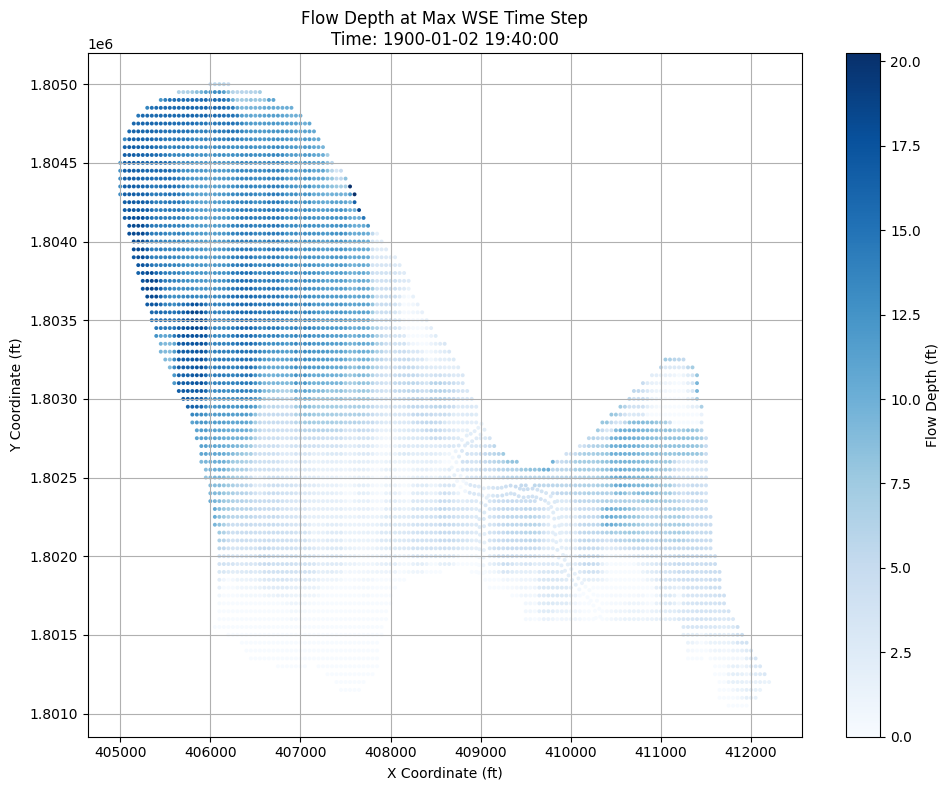

In [10]:
import h5py
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# === Load the HDF5 file ===
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:

    # === Load datasets ===
    wse = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    min_elev = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Minimum Elevation"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

# === Parse time and coordinates ===
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

# === Create xarray for WSE ===
wse_xr_ras = xr.DataArray(
    wse,
    dims=["time", "cell"],
    coords={"time": time_index, "x": ("cell", x_coords), "y": ("cell", y_coords)},
    name="water_surface_elevation",
    attrs={"units": "ft"}
)

# === Identify timestep with maximum average WSE ===
max_time_idx = wse_xr_ras.mean(dim="cell").argmax().item()
max_time = time_index[max_time_idx]
wse_at_max = wse_xr_ras.sel(time=max_time)

# === Calculate Flow Depth ===
flow_depth = wse_at_max - min_elev

# === Plot ===
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    wse_xr_ras["x"].values,
    wse_xr_ras["y"].values,
    c=flow_depth.values,
    cmap="Blues",
    s=8,
    edgecolor="none"
)
plt.colorbar(scatter, label="Flow Depth (ft)")
plt.title(f"Flow Depth at Max WSE Time Step\nTime: {max_time}")
plt.xlabel("X Coordinate (ft)")
plt.ylabel("Y Coordinate (ft)")
plt.grid(True)
plt.tight_layout()
plt.show()


### OPTIONAL: SAVE ANIMATION AS GIF (TAKES 2-3 MINUTES TO PROCESS)

### Install required packages (run this in a Jupyter notebook cell)
!pip install xarray matplotlib imageio --quiet

import h5py
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm

### --- Load Data ---
file_path = "Data/Hdf5/RAS_Muncie.p04.hdf"
with h5py.File(file_path, "r") as hdf:
    wse_data = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/2D Interior Area/Water Surface"][()]
    coords = hdf["/Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate"][()]
    time_stamps = hdf["/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp"][()].astype(str)

### --- Set Up xarray ---
x_coords, y_coords = coords[:, 0], coords[:, 1]
time_index = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")

wse_xr_ras = xr.DataArray(
    wse_data,
    dims=["time", "cell"],
    coords={
        "time": time_index,
        "x": ("cell", x_coords),
        "y": ("cell", y_coords)
    },
    name="water_surface_elevation"
)

### --- Prepare Animation ---
filenames = []
vmin, vmax = np.nanmin(wse_data), np.nanmax(wse_data)  # consistent color scale

for i, t in tqdm(enumerate(wse_xr_ras.time.values), total=wse_xr_ras.sizes['time']):
    fig, ax = plt.subplots(figsize=(10, 8))
    sc = ax.scatter(wse_xr_ras.x, wse_xr_ras.y, c=wse_xr_ras.sel(time=t), cmap="viridis", s=8, vmin=vmin, vmax=vmax)
    plt.colorbar(sc, ax=ax, label="Water Surface Elevation (ft)")
    ax.set_title(f"WSE Time: {pd.to_datetime(t).strftime('%Y-%m-%d %H:%M')}")
    ax.set_xlabel("X Coordinate (ft)")
    ax.set_ylabel("Y Coordinate (ft)")
    ax.grid(True)
    plt.tight_layout()

    filename = f"_frame_{i:04d}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

### --- Create GIF ---
with imageio.get_writer("wse_animation_RAS.gif", mode="I", duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

### --- Cleanup PNGs ---
import os
for filename in filenames:
    os.remove(filename)

print("✅ Animation saved as wse_animation.gif")


------

# Using your Jupyter Notebook as Context to Add Functionality

For the rest of the exercise, we will use the new line of reasoning models (o1), using this notebook as context.  

Provide this notebook to any of the following models:

- ChatGPT
    - [o1](https://chatgpt.com/?model=o1)
    - [o3-mini high](https://chatgpt.com/?model=o3-mini-high)

- [Anthropic's Claude](https://claude.ai/)

- [Google's Gemini 2.5](https://aistudio.google.com/prompts/new_chat)

These are all State of the Art, Long Context Models with Reasoning Capability.  This enables longer scripts to be coded with a more consistent output and reduced errors. 

<div class="alert alert-block alert-info">
<b>Note:</b> Clear image outputs before saving and uploading.  The file size should be around 66KB.
</div>  


## OPTION 1: FLO2D: Calculate Flow x Depth and Save back to HDF

- **Objective**: Create a Python script to manipulate HDF5 file data.
- **File Path**: `Data\Hdf5\TIMDEPNC.HDF5`
- **Data Tasks**:
  - **Add Table `dep_x_vel`**: Multiply depth and velocity data.
  - **Add Table `dep_x_sqvel`**: Multiply depth by velocity squared.
- **Groups and Datasets**:
  - **Group `TIMDEP OUTPUT RESULTS/FLOW DEPTH`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
  - **Group `TIMDEP OUTPUT RESULTS/MAX VEL`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
- **Operations**:
  - **Delete Existing Datasets**: Check and delete existing datasets `dep_x_vel` and `dep_x_sqvel` if present.
  - **Calculate and Store New Data**: Compute and store new datasets for `dep_x_vel` and `dep_x_sqvel`.
- **Dependencies**: Utilize `h5py` for HDF5 interaction and `numpy` for mathematical operations.
- **Request**: Provide a Python script that executes the above operations as described.

In [11]:
# Insert Code Here

In [12]:
import h5py
import numpy as np
import os
from pathlib import Path

# Define the file path using the base_path established earlier
# Assumes 'base_path' is defined in a previous cell as Path.cwd()
# If not, uncomment the following line:
# base_path = Path.cwd() 
hdf_filepath = base_path / "Data" / "Hdf5" / "TIMDEPNC.HDF5"

# Define the paths within the HDF5 file
output_group_path = "/TIMDEP OUTPUT RESULTS"
depth_values_path = f"{output_group_path}/FLOW DEPTH/Values"
velocity_values_path = f"{output_group_path}/MAX VEL/Values"
dep_x_vel_path = f"{output_group_path}/dep_x_vel"
dep_x_sqvel_path = f"{output_group_path}/dep_x_sqvel"

print(f"🔄 Processing HDF5 file: {hdf_filepath}")

try:
    # Open the HDF5 file in read/write mode ('r+')
    # Use 'a' mode if you want to create the file if it doesn't exist, 
    # but 'r+' is safer if you expect the file to be there.
    with h5py.File(hdf_filepath, 'r+') as f:
        
        print(f"📂 Successfully opened file in read/write mode.")
        
        # Access the parent group
        output_group = f[output_group_path]

        # --- Check and delete existing datasets ---
        print("🔍 Checking for existing calculated datasets...")
        if dep_x_vel_path.split('/')[-1] in output_group:
            del output_group[dep_x_vel_path.split('/')[-1]]
            print(f"   - Deleted existing dataset: {dep_x_vel_path}")
        else:
            print(f"   - Dataset {dep_x_vel_path} not found. Will create.")
            
        if dep_x_sqvel_path.split('/')[-1] in output_group:
            del output_group[dep_x_sqvel_path.split('/')[-1]]
            print(f"   - Deleted existing dataset: {dep_x_sqvel_path}")
        else:
            print(f"   - Dataset {dep_x_sqvel_path} not found. Will create.")

        # --- Read input data ---
        print("💾 Reading input datasets (Depth and Velocity)...")
        if depth_values_path in f and velocity_values_path in f:
            depth_values = f[depth_values_path][:]  # Read all data into numpy array
            velocity_values = f[velocity_values_path][:] # Read all data into numpy array
            print(f"   - Read Depth data with shape: {depth_values.shape}")
            print(f"   - Read Velocity data with shape: {velocity_values.shape}")
        else:
            raise KeyError(f"Input datasets not found at {depth_values_path} or {velocity_values_path}")

        # --- Perform calculations ---
        print("🧮 Performing calculations...")
        # Ensure calculations handle potential NaN or zero values appropriately if necessary
        # For this example, direct multiplication is used.
        dep_x_vel_data = depth_values * velocity_values
        dep_x_sqvel_data = depth_values * np.square(velocity_values)
        print("   - Calculated dep_x_vel")
        print("   - Calculated dep_x_sqvel")

        # --- Write new datasets ---
        print("💾 Writing new datasets back to HDF5 file...")
        # Create new datasets within the output group
        # Use the same dtype as input (float32) unless otherwise specified
        output_group.create_dataset(dep_x_vel_path.split('/')[-1], data=dep_x_vel_data, dtype=np.float32)
        print(f"   - Created dataset: {dep_x_vel_path} with shape {dep_x_vel_data.shape}")
        
        output_group.create_dataset(dep_x_sqvel_path.split('/')[-1], data=dep_x_sqvel_data, dtype=np.float32)
        print(f"   - Created dataset: {dep_x_sqvel_path} with shape {dep_x_sqvel_data.shape}")

    print("✅ Processing complete. File closed.")

except FileNotFoundError:
    print(f"❌ Error: HDF5 file not found at {hdf_filepath}")
except KeyError as e:
    print(f"❌ Error: Dataset or Group not found within HDF5 file: {e}")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


🔄 Processing HDF5 file: c:\GH\ASFPM-LLM-Data-Management-Workshop\Data\Hdf5\TIMDEPNC.HDF5
📂 Successfully opened file in read/write mode.
🔍 Checking for existing calculated datasets...
   - Deleted existing dataset: /TIMDEP OUTPUT RESULTS/dep_x_vel
   - Deleted existing dataset: /TIMDEP OUTPUT RESULTS/dep_x_sqvel
💾 Reading input datasets (Depth and Velocity)...
   - Read Depth data with shape: (200, 8588)
   - Read Velocity data with shape: (200, 8588)
🧮 Performing calculations...
   - Calculated dep_x_vel
   - Calculated dep_x_sqvel
💾 Writing new datasets back to HDF5 file...
   - Created dataset: /TIMDEP OUTPUT RESULTS/dep_x_vel with shape (200, 8588)
   - Created dataset: /TIMDEP OUTPUT RESULTS/dep_x_sqvel with shape (200, 8588)
✅ Processing complete. File closed.


📊 Plotting results from: c:\GH\ASFPM-LLM-Data-Management-Workshop\Data\Hdf5\TIMDEPNC.HDF5
📂 File opened successfully in read mode.
💾 Reading coordinate data...
   - Read X coordinates shape: (8588,)
   - Read Y coordinates shape: (8588,)
💾 Reading calculated datasets...
   - Read dep_x_vel data shape: (200, 8588)
   - Read dep_x_sqvel data shape: (200, 8588)
📈 Calculating maximum values over time...
   - Calculated max dep_x_vel shape: (8588,)
   - Calculated max dep_x_sqvel shape: (8588,)
🎨 Generating plots...


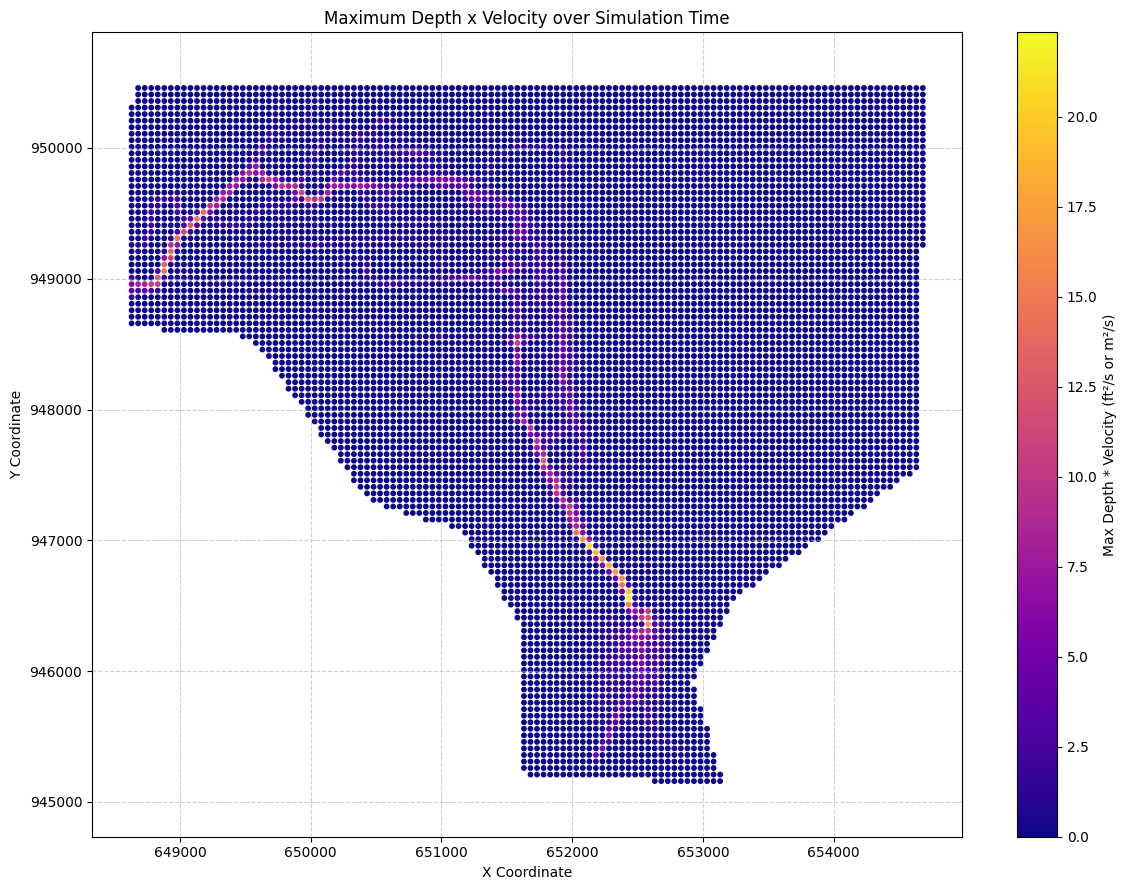

   - Plot 1 (Max Depth x Velocity) displayed.


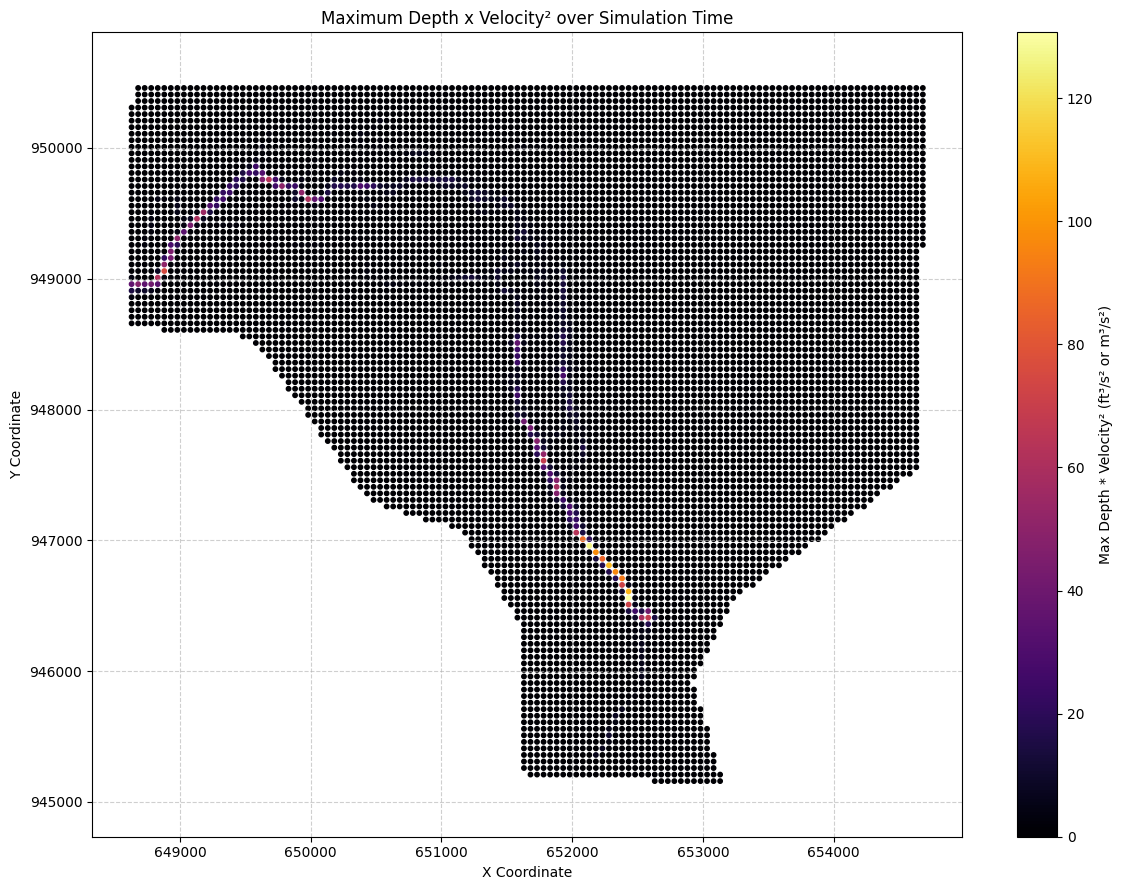

   - Plot 2 (Max Depth x Velocity²) displayed.
✅ Plotting complete.


In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os 

# Define the file path using the base_path established earlier
# Assumes 'base_path' is defined in a previous cell as Path.cwd()
# If not, uncomment the following line:
# base_path = Path.cwd() 
hdf_filepath = base_path / "Data" / "Hdf5" / "TIMDEPNC.HDF5"

# Define the paths within the HDF5 file
output_group_path = "/TIMDEP OUTPUT RESULTS"
x_coords_path = f"{output_group_path}/X-Coordinate/Values"
y_coords_path = f"{output_group_path}/Y-Coordinate/Values"
dep_x_vel_path = f"{output_group_path}/dep_x_vel"
dep_x_sqvel_path = f"{output_group_path}/dep_x_sqvel"

print(f"📊 Plotting results from: {hdf_filepath}")

try:
    # Open the HDF5 file in read mode ('r')
    with h5py.File(hdf_filepath, 'r') as f:
        print("📂 File opened successfully in read mode.")

        # --- Check if datasets exist ---
        if not (dep_x_vel_path in f and dep_x_sqvel_path in f):
            raise KeyError(f"Calculated datasets '{dep_x_vel_path}' or '{dep_x_sqvel_path}' not found. "
                           "Ensure the previous cell (Option 1) ran successfully.")
        
        if not (x_coords_path in f and y_coords_path in f):
             raise KeyError(f"Coordinate datasets '{x_coords_path}' or '{y_coords_path}' not found.")


        # --- Read Coordinates ---
        print("💾 Reading coordinate data...")
        x_coords = f[x_coords_path][:].flatten()
        y_coords = f[y_coords_path][:].flatten()
        print(f"   - Read X coordinates shape: {x_coords.shape}")
        print(f"   - Read Y coordinates shape: {y_coords.shape}")
        
        # --- Read Calculated Data ---
        print("💾 Reading calculated datasets...")
        dep_x_vel_data = f[dep_x_vel_path][:]
        dep_x_sqvel_data = f[dep_x_sqvel_path][:]
        print(f"   - Read dep_x_vel data shape: {dep_x_vel_data.shape}")
        print(f"   - Read dep_x_sqvel data shape: {dep_x_sqvel_data.shape}")

        # --- Calculate Maximum over Time ---
        print("📈 Calculating maximum values over time...")
        max_dep_x_vel = np.max(dep_x_vel_data, axis=0)
        max_dep_x_sqvel = np.max(dep_x_sqvel_data, axis=0)
        print(f"   - Calculated max dep_x_vel shape: {max_dep_x_vel.shape}")
        print(f"   - Calculated max dep_x_sqvel shape: {max_dep_x_sqvel.shape}")

        # --- Plotting ---
        print("🎨 Generating plots...")
        
        # Plot Max Depth * Velocity
        plt.figure(figsize=(12, 9))
        plt.scatter(
            x_coords, 
            y_coords, 
            c=max_dep_x_vel, 
            s=10, 
            cmap='plasma', # Colormap suitable for intensity
            vmin=0 # Start color scale at 0 if appropriate
        )
        plt.colorbar(label='Max Depth * Velocity (ft²/s or m²/s)')
        plt.title('Maximum Depth x Velocity over Simulation Time')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.axis('equal') # Ensure aspect ratio is equal
        plt.tight_layout()
        plt.show()
        print("   - Plot 1 (Max Depth x Velocity) displayed.")

        # Plot Max Depth * Velocity^2
        plt.figure(figsize=(12, 9))
        plt.scatter(
            x_coords, 
            y_coords, 
            c=max_dep_x_sqvel, 
            s=10, 
            cmap='inferno', # Another intensity colormap
            vmin=0 # Start color scale at 0 if appropriate
        )
        plt.colorbar(label='Max Depth * Velocity² (ft³/s² or m³/s²)')
        plt.title('Maximum Depth x Velocity² over Simulation Time')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.axis('equal') # Ensure aspect ratio is equal
        plt.tight_layout()
        plt.show()
        print("   - Plot 2 (Max Depth x Velocity²) displayed.")

    print("✅ Plotting complete.")

except FileNotFoundError:
    print(f"❌ Error: HDF5 file not found at {hdf_filepath}")
except KeyError as e:
    print(f"❌ Error: {e}")
except Exception as e:
    print(f"❌ An unexpected error occurred during plotting: {e}")

## OPTION 2: FLO2D Flood Wave Arrival Time

`Assuming the notebook has been run and the xarrays above are present, add a code cell for FLO2D that will find the time stamp of each grid cell, at the time where it exceeds 1ft in depth.  This indicates the first arrival of the flood wave. Create a function to find this and calculate time_to_1ft and save the daaset back to the hdf.  The function should overwrite the dataset in the hdf if it exists.  I should also plot a map of the flood wave arrival time time in hr.`

In [14]:
# Insert Code Here

--- Flood Wave Arrival Time Calculation (FLO2D) ---
File: c:\GH\ASFPM-LLM-Data-Management-Workshop\Data\Hdf5\TIMDEPNC.HDF5
Depth Threshold: 1.0 ft (or m)
⏳ Calculating arrival times for 8588 elements...
   - Calculation complete. 622 elements reached the threshold.
💾 Saving arrival times to c:\GH\ASFPM-LLM-Data-Management-Workshop\Data\Hdf5\TIMDEPNC.HDF5 at path /TIMDEP OUTPUT RESULTS/time_to_1_ft...
   - Existing dataset found at /TIMDEP OUTPUT RESULTS/time_to_1_ft. Deleting...
   - Dataset deleted.
   - Dataset created successfully under group '/TIMDEP OUTPUT RESULTS'.
   - Save successful.
📊 Plotting arrival time map from c:\GH\ASFPM-LLM-Data-Management-Workshop\Data\Hdf5\TIMDEPNC.HDF5...
   - Read arrival times shape: (8588,)
   - Read coordinates shape: (8588,)


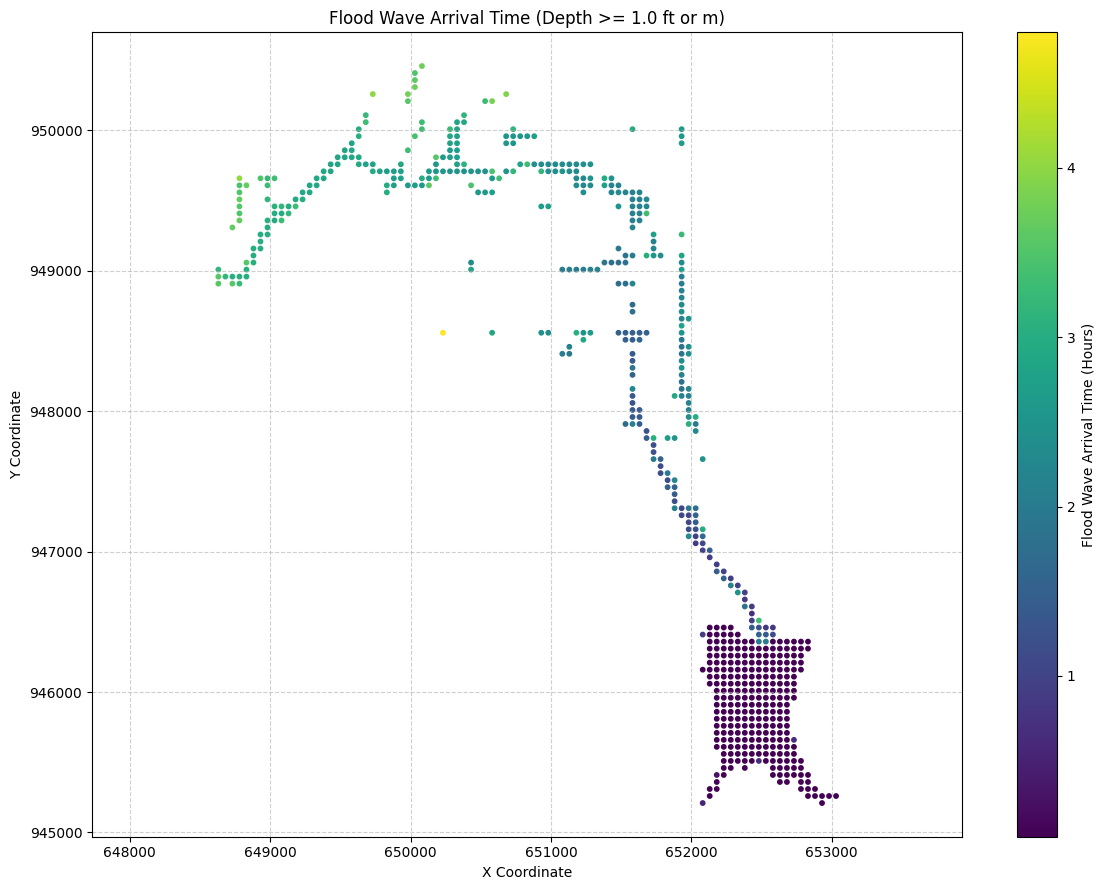

   - Plot displayed.
--- Process Finished ---


In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

# --- Configuration ---
# Assumes 'base_path' is defined in a previous cell as Path.cwd()
# If not, uncomment the following line:
# base_path = Path.cwd() 
hdf_filepath = base_path / "Data" / "Hdf5" / "TIMDEPNC.HDF5"
depth_threshold = 1.0  # Depth threshold in feet (or meters, depending on model units)

# Define paths within the HDF5 file
output_group_path = "/TIMDEP OUTPUT RESULTS"
depth_values_path = f"{output_group_path}/FLOW DEPTH/Values"
times_path = f"{output_group_path}/FLOW DEPTH/Times"
x_coords_path = f"{output_group_path}/X-Coordinate/Values"
y_coords_path = f"{output_group_path}/Y-Coordinate/Values"
arrival_time_dataset_name = "time_to_1_ft" # Name of the dataset to create/overwrite
arrival_time_full_path = f"{output_group_path}/{arrival_time_dataset_name}"

print(f"--- Flood Wave Arrival Time Calculation (FLO2D) ---")
print(f"File: {hdf_filepath}")
print(f"Depth Threshold: {depth_threshold} ft (or m)")

# --- Function to Calculate Arrival Time ---
def calculate_arrival_time(depth_values, times, threshold):
    """
    Calculates the first time step where depth exceeds a threshold for each element.

    Args:
        depth_values (np.ndarray): 2D array of depths (time, element).
        times (np.ndarray): 1D array of time values corresponding to the first axis of depth_values.
        threshold (float): The depth threshold to check against.

    Returns:
        np.ndarray: 1D array of arrival times for each element (NaN if threshold never met).
                    Shape: (element,). dtype: float64.
    """
    print(f"⏳ Calculating arrival times for {depth_values.shape[1]} elements...")
    num_times, num_elements = depth_values.shape
    
    # Create boolean array where depth exceeds threshold
    depth_exceeds = depth_values >= threshold
    
    # Find the index of the *first* time step where the threshold is met (axis=0)
    first_indices = np.argmax(depth_exceeds, axis=0)
    
    # Check if the threshold was *actually* met at the found index.
    # np.argmax returns 0 if *no* value in a column is True.
    # We need to verify that the depth at index `first_indices[i]` for element `i` is >= threshold.
    # This uses advanced indexing to get the depth value at the 'first_indices' for each element.
    actually_exceeded_mask = depth_values[first_indices, np.arange(num_elements)] >= threshold
    
    # Initialize arrival times with NaN (Not a Number)
    # Use float64 to match the original 'Times' dataset dtype and allow NaN
    arrival_times = np.full(num_elements, np.nan, dtype=np.float64) 
    
    # Fill in the arrival times only for elements where the threshold was met
    arrival_times[actually_exceeded_mask] = times[first_indices[actually_exceeded_mask]]
    
    num_flooded = np.sum(actually_exceeded_mask)
    print(f"   - Calculation complete. {num_flooded} elements reached the threshold.")
    return arrival_times

# --- Function to Save Arrival Time Data ---
def save_arrival_time_to_hdf(filepath, dataset_path, data):
    """
    Saves the arrival time data to the HDF5 file, overwriting if it exists.

    Args:
        filepath (Path): Path to the HDF5 file.
        dataset_path (str): Full path within the HDF5 file to save the dataset.
        data (np.ndarray): The arrival time data to save.
    """
    print(f"💾 Saving arrival times to {filepath} at path {dataset_path}...")
    try:
        with h5py.File(filepath, 'r+') as f:
            # Check if the dataset exists and delete it if it does
            if dataset_path in f:
                print(f"   - Existing dataset found at {dataset_path}. Deleting...")
                del f[dataset_path]
                print(f"   - Dataset deleted.")
            else:
                print(f"   - Dataset not found at {dataset_path}. Creating new dataset.")
                
            # Create the new dataset
            # Infer group path if dataset path contains '/'
            group_path = '/'.join(dataset_path.split('/')[:-1])
            dset_name = dataset_path.split('/')[-1]
            if group_path and group_path in f:
                 target_group = f[group_path]
                 target_group.create_dataset(dset_name, data=data, dtype=data.dtype)
                 print(f"   - Dataset created successfully under group '{group_path}'.")
            elif not group_path: # Saving at root level (shouldn't happen here based on path)
                 f.create_dataset(dset_name, data=data, dtype=data.dtype)
                 print(f"   - Dataset created successfully at root level.")
            else: # Group doesn't exist (shouldn't happen here either)
                print(f"   - Error: Parent group '{group_path}' does not exist.")
                return False

        print(f"   - Save successful.")
        return True
    except FileNotFoundError:
        print(f"❌ Error: HDF5 file not found at {filepath}")
        return False
    except Exception as e:
        print(f"❌ An unexpected error occurred during saving: {e}")
        return False

# --- Function to Plot Arrival Time Map ---
def plot_arrival_time_map(filepath, arrival_time_path, x_coord_path, y_coord_path):
    """
    Reads arrival time and coordinates from HDF5 and plots a map.

    Args:
        filepath (Path): Path to the HDF5 file.
        arrival_time_path (str): Path to the arrival time dataset.
        x_coord_path (str): Path to the X coordinate dataset.
        y_coord_path (str): Path to the Y coordinate dataset.
    """
    print(f"📊 Plotting arrival time map from {filepath}...")
    try:
        with h5py.File(filepath, 'r') as f:
            # Check if required datasets exist
            if not all(p in f for p in [arrival_time_path, x_coord_path, y_coord_path]):
                 missing = [p for p in [arrival_time_path, x_coord_path, y_coord_path] if p not in f]
                 raise KeyError(f"Required datasets not found: {', '.join(missing)}")
                 
            # Read data
            arrival_times = f[arrival_time_path][:]
            x_coords = f[x_coord_path][:].flatten()
            y_coords = f[y_coord_path][:].flatten()
            print(f"   - Read arrival times shape: {arrival_times.shape}")
            print(f"   - Read coordinates shape: {x_coords.shape}")

            # Create the plot
            plt.figure(figsize=(12, 9))
            # Create a mask for valid (non-NaN) arrival times for plotting
            valid_mask = ~np.isnan(arrival_times)
            
            scatter = plt.scatter(
                x_coords[valid_mask], 
                y_coords[valid_mask], 
                c=arrival_times[valid_mask], 
                s=10, 
                cmap='viridis' # Sequential colormap suitable for time
            )
            plt.colorbar(scatter, label='Flood Wave Arrival Time (Hours)') # Assuming time unit is Hours based on HDF attributes
            plt.title(f'Flood Wave Arrival Time (Depth >= {depth_threshold} ft or m)')
            plt.xlabel('X Coordinate')
            plt.ylabel('Y Coordinate')
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.axis('equal') 
            plt.tight_layout()
            plt.show()
            print("   - Plot displayed.")

    except FileNotFoundError:
        print(f"❌ Error: HDF5 file not found at {filepath}")
    except KeyError as e:
        print(f"❌ Error reading from HDF5: {e}")
    except Exception as e:
        print(f"❌ An unexpected error occurred during plotting: {e}")


# --- Main Execution ---
try:
    # 1. Calculate Arrival Time
    with h5py.File(hdf_filepath, 'r') as f_read:
        # Check necessary input datasets exist first
        if not all(p in f_read for p in [depth_values_path, times_path]):
            missing = [p for p in [depth_values_path, times_path] if p not in f_read]
            raise KeyError(f"Input datasets for calculation not found: {', '.join(missing)}")
            
        depth_data = f_read[depth_values_path][:]
        time_data = f_read[times_path][:]
        
    arrival_time_results = calculate_arrival_time(depth_data, time_data, depth_threshold)

    # 2. Save Results to HDF5
    if arrival_time_results is not None:
        save_successful = save_arrival_time_to_hdf(hdf_filepath, arrival_time_full_path, arrival_time_results)
        
        # 3. Plot Results (only if save was attempted, successful or not, as data exists in memory)
        plot_arrival_time_map(hdf_filepath, arrival_time_full_path, x_coords_path, y_coords_path)

except KeyError as e:
    print(f"❌ Error: Input dataset missing - {e}")
except Exception as e:
    print(f"❌ An unexpected error occurred in the main execution block: {e}")

print("--- Process Finished ---")

# OPTION 3: RAS 2D Flood Wave Arrival Time

'Assuming the notebook has been run and the xarrays above are present, add a code cell similar to Option 2, but for HEC-RAS 2D`




--- Flood Wave Arrival Time Calculation (HEC-RAS 2D) ---
File: c:\GH\ASFPM-LLM-Data-Management-Workshop\Data\Hdf5\RAS_Muncie.p04.hdf
Depth Threshold: 1.0 ft (or m)
ℹ️ Found 2D Area(s): 2D Interior Area. Using '2D Interior Area'.
💾 Reading data for area '2D Interior Area'...
   - Read WSE shape: (289, 5765)
   - Read Min Elevation shape: (5765,)
   - Read Coords shape: (5765, 2)
   - Read Timestamps shape: (289,)
⏳ Calculating arrival times...
   - Converting timestamps to relative hours...
   - Time range: 0.00 to 24.00 hours.
   - Calculating depth (WSE - Min Elevation)...
   - Calculated depth array shape: (289, 5765)
   - Finding first time step where depth >= 1.0...
   - Calculation complete. 4603 cells reached the threshold.
📊 Plotting arrival time map...


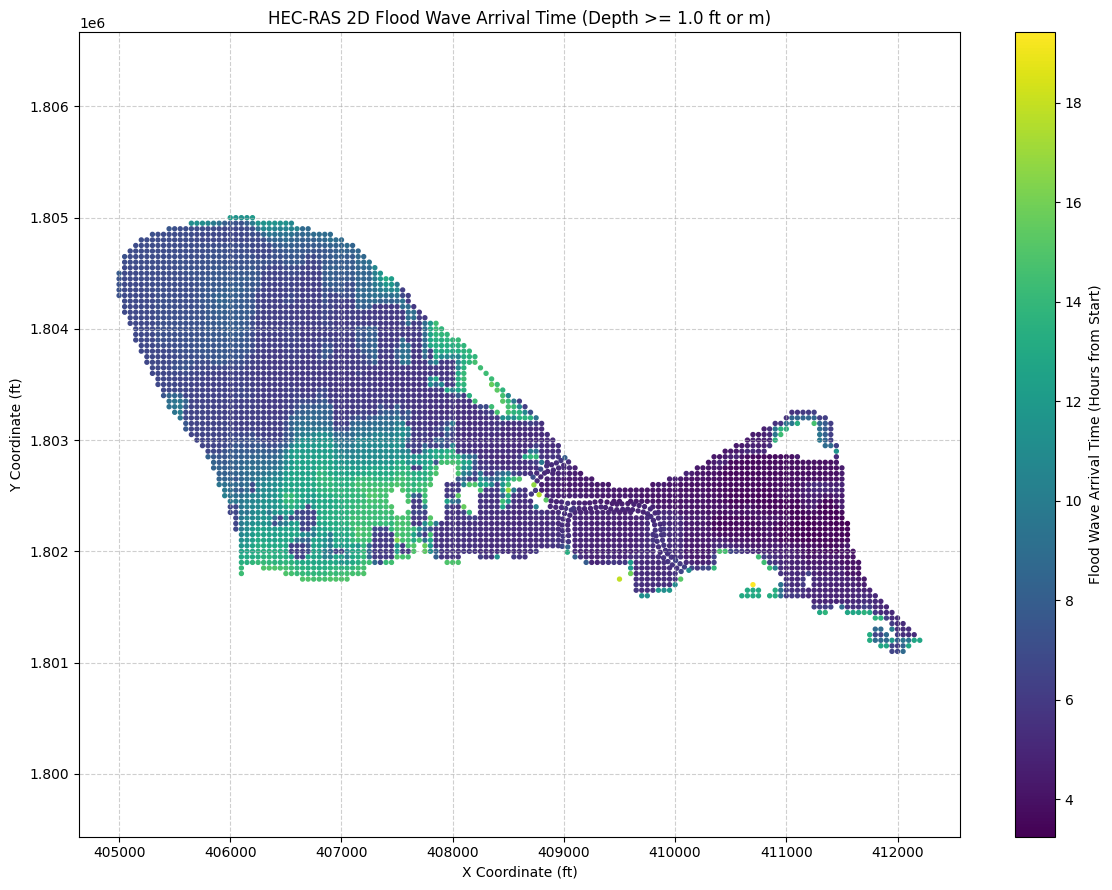

   - Plot displayed.
--- Process Finished ---


In [16]:
# Insert Code Here

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# --- Configuration ---
# Assumes 'base_path' is defined in a previous cell as Path.cwd()
# If not, uncomment the following line:
# base_path = Path.cwd()
hdf_filepath = base_path / "Data" / "Hdf5" / "RAS_Muncie.p04.hdf"
depth_threshold = 1.0  # Depth threshold in feet (or meters, depending on model units)

print(f"--- Flood Wave Arrival Time Calculation (HEC-RAS 2D) ---")
print(f"File: {hdf_filepath}")
print(f"Depth Threshold: {depth_threshold} ft (or m)")

# --- Helper Function to Get 2D Area Name ---
def get_2d_area_name(filepath):
    """Reads the name(s) of the 2D Flow Area(s) from the HDF file."""
    try:
        with h5py.File(filepath, 'r') as f:
            area_names_ds = f["/Results/Unsteady/Geometry Info/2D Area(s)"]
            # Decode from bytes to string, remove potential trailing spaces
            area_names = [name.decode('utf-8').strip() for name in area_names_ds[()]]
            if not area_names:
                print("❌ Error: No 2D Area names found in HDF file.")
                return None
            # For this example, assume we use the first area if multiple exist
            print(f"ℹ️ Found 2D Area(s): {', '.join(area_names)}. Using '{area_names[0]}'.")
            return area_names[0]
    except FileNotFoundError:
        print(f"❌ Error: HDF5 file not found at {filepath}")
        return None
    except KeyError:
        print("❌ Error: Path '/Results/Unsteady/Geometry Info/2D Area(s)' not found.")
        return None
    except Exception as e:
        print(f"❌ An unexpected error occurred getting area name: {e}")
        return None

# --- Function to Calculate Arrival Time (HEC-RAS specific) ---
def calculate_ras_arrival_time(wse_values, min_elev_values, time_stamps, threshold):
    """
    Calculates the first relative time (hours) where calculated depth exceeds a threshold.

    Args:
        wse_values (np.ndarray): 2D array of WSE (time, cell).
        min_elev_values (np.ndarray): 1D array of cell minimum elevations (cell,).
        time_stamps (np.ndarray): 1D array of absolute time stamp strings.
        threshold (float): The depth threshold to check against.

    Returns:
        np.ndarray: 1D array of arrival times in hours for each cell (NaN if threshold never met).
                    Shape: (cell,). dtype: float64.
        np.ndarray: 1D array of relative times in hours corresponding to time_stamps.
    """
    print("⏳ Calculating arrival times...")
    num_times, num_cells = wse_values.shape
    if min_elev_values.shape[0] != num_cells:
        raise ValueError(f"Shape mismatch: WSE has {num_cells} cells, Min Elevation has {min_elev_values.shape[0]} cells.")

    # Convert absolute timestamps to relative time in hours
    print("   - Converting timestamps to relative hours...")
    try:
        absolute_times_pd = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")
        time_zero = absolute_times_pd[0]
        relative_times_hours = (absolute_times_pd - time_zero).total_seconds() / 3600.0
        print(f"   - Time range: {relative_times_hours.min():.2f} to {relative_times_hours.max():.2f} hours.")
    except ValueError as e:
        print(f"❌ Error parsing timestamps: {e}. Check format.")
        raise

    # Calculate depth: WSE - Min Elevation
    # Broadcast min_elev_values to match WSE shape for element-wise subtraction
    print("   - Calculating depth (WSE - Min Elevation)...")
    # Handle potential non-finite WSE values before subtraction if necessary
    # wse_values[~np.isfinite(wse_values)] = -np.inf # Or some other strategy
    depth_values = wse_values - min_elev_values[np.newaxis, :]
    print(f"   - Calculated depth array shape: {depth_values.shape}")

    # Find the index of the *first* time step where the threshold is met (axis=0)
    print(f"   - Finding first time step where depth >= {threshold}...")
    depth_exceeds = depth_values >= threshold
    first_indices = np.argmax(depth_exceeds, axis=0)

    # Check if the threshold was *actually* met at the found index.
    actually_exceeded_mask = depth_values[first_indices, np.arange(num_cells)] >= threshold

    # Initialize arrival times with NaN
    arrival_times = np.full(num_cells, np.nan, dtype=np.float64)

    # Fill in the arrival times (using relative hours) only for elements where the threshold was met
    arrival_times[actually_exceeded_mask] = relative_times_hours[first_indices[actually_exceeded_mask]]

    num_flooded = np.sum(actually_exceeded_mask)
    print(f"   - Calculation complete. {num_flooded} cells reached the threshold.")
    return arrival_times, relative_times_hours.values # Return numpy array for times

# --- Function to Plot Arrival Time Map (Generic, reused) ---
def plot_arrival_time_map_ras(x_coords, y_coords, arrival_times, threshold):
    """ Plots the arrival time map. """
    print(f"📊 Plotting arrival time map...")
    try:
        plt.figure(figsize=(12, 9))
        # Create a mask for valid (non-NaN) arrival times for plotting
        valid_mask = ~np.isnan(arrival_times)

        if not np.any(valid_mask):
             print("   - No cells reached the threshold. Skipping plot.")
             return

        scatter = plt.scatter(
            x_coords[valid_mask],
            y_coords[valid_mask],
            c=arrival_times[valid_mask],
            s=8, # Smaller points often better for dense RAS meshes
            cmap='viridis'
        )
        plt.colorbar(scatter, label='Flood Wave Arrival Time (Hours from Start)')
        plt.title(f'HEC-RAS 2D Flood Wave Arrival Time (Depth >= {threshold} ft or m)')
        plt.xlabel('X Coordinate (ft)') # Assuming ft from HDF attributes
        plt.ylabel('Y Coordinate (ft)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        print("   - Plot displayed.")

    except Exception as e:
        print(f"❌ An unexpected error occurred during plotting: {e}")


# --- Main Execution ---
selected_area_name = get_2d_area_name(hdf_filepath)

if selected_area_name:
    # Construct HDF5 paths using the area name
    wse_path = f"/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{selected_area_name}/Water Surface"
    min_elev_path = f"/Geometry/2D Flow Areas/{selected_area_name}/Cells Minimum Elevation"
    coords_path = f"/Geometry/2D Flow Areas/{selected_area_name}/Cells Center Coordinate"
    times_path = "/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp" # Same for all areas

    try:
        # Read necessary data from HDF5
        print(f"💾 Reading data for area '{selected_area_name}'...")
        with h5py.File(hdf_filepath, 'r') as f:
            # Check paths exist
            required_paths = [wse_path, min_elev_path, coords_path, times_path]
            if not all(p in f for p in required_paths):
                 missing = [p for p in required_paths if p not in f]
                 raise KeyError(f"Required datasets/groups not found: {', '.join(missing)}")

            wse_data = f[wse_path][()] # Use [()] to read full dataset
            min_elev_data = f[min_elev_path][()]
            coords_data = f[coords_path][()]
            time_stamps_data = f[times_path][()].astype(str) # Ensure strings

        print(f"   - Read WSE shape: {wse_data.shape}")
        print(f"   - Read Min Elevation shape: {min_elev_data.shape}")
        print(f"   - Read Coords shape: {coords_data.shape}")
        print(f"   - Read Timestamps shape: {time_stamps_data.shape}")

        # Calculate Arrival Times
        arrival_time_results, relative_times = calculate_ras_arrival_time(
            wse_data, min_elev_data, time_stamps_data, depth_threshold
        )

        # Plot Results
        if arrival_time_results is not None:
             # Separate coords for clarity
             x_coords = coords_data[:, 0]
             y_coords = coords_data[:, 1]
             plot_arrival_time_map_ras(x_coords, y_coords, arrival_time_results, depth_threshold)

    except FileNotFoundError:
        print(f"❌ Error: HDF5 file not found at {hdf_filepath}")
    except KeyError as e:
        print(f"❌ Error: Dataset/Group missing in HDF5 - {e}")
    except ValueError as e:
        print(f"❌ Error during calculation: {e}")
    except Exception as e:
        print(f"❌ An unexpected error occurred in the main execution block: {e}")

else:
    print("❌ Cannot proceed without a valid 2D Area name.")

print("--- Process Finished ---")

# OPTION 4: RAS 2D Time of Max WSEL

'Assuming the notebook has been run and the xarrays above are present, add a code cell that will find the timestamp of the max wsel of each cell, calculate time_to_max_wsel and map it. 




In [17]:
# Insert Code Here

--- Time of Maximum WSEL Calculation (HEC-RAS 2D) ---
File: c:\GH\ASFPM-LLM-Data-Management-Workshop\Data\Hdf5\RAS_Muncie.p04.hdf
ℹ️ Found 2D Area(s): 2D Interior Area. Using '2D Interior Area'.
💾 Reading data for area '2D Interior Area'...
   - Read WSE shape: (289, 5765)
   - Read Coords shape: (5765, 2)
   - Read Timestamps shape: (289,)
⏳ Calculating time of maximum WSEL...
   - Converting timestamps to relative hours...
   - Time range: 0.00 to 24.00 hours.
   - Finding index of maximum WSEL for each cell...
   - Calculation complete.
📊 Plotting Time of Maximum WSEL map...


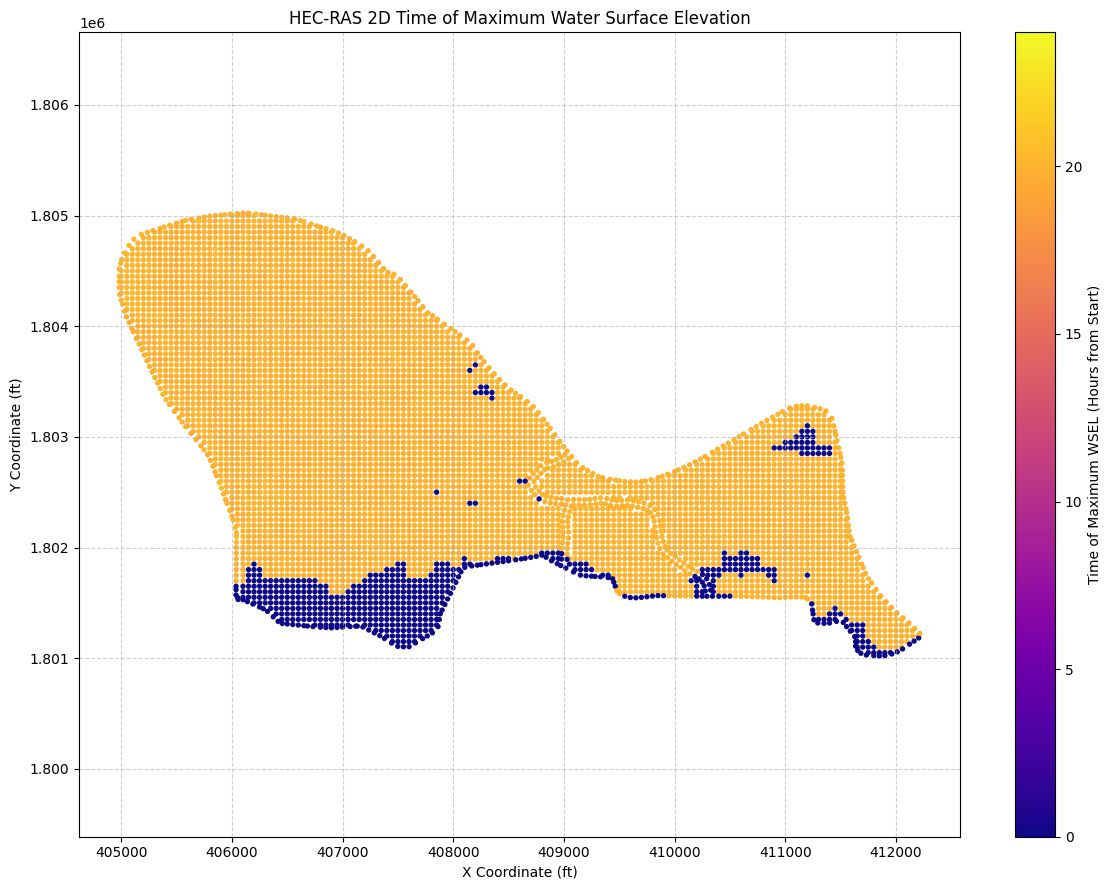

   - Plot displayed.
--- Process Finished ---


In [20]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# --- Configuration ---
# Assumes 'base_path' is defined in a previous cell as Path.cwd()
# If not, uncomment the following line:
# base_path = Path.cwd()
hdf_filepath = base_path / "Data" / "Hdf5" / "RAS_Muncie.p04.hdf"

print(f"--- Time of Maximum WSEL Calculation (HEC-RAS 2D) ---")
print(f"File: {hdf_filepath}")

# --- Helper Function to Get 2D Area Name (Reused from Option 3) ---
def get_2d_area_name(filepath):
    """Reads the name(s) of the 2D Flow Area(s) from the HDF file."""
    try:
        with h5py.File(filepath, 'r') as f:
            # Check if the dataset exists
            path_to_check = "/Results/Unsteady/Geometry Info/2D Area(s)"
            if path_to_check not in f:
                 print(f"❌ Error: Path '{path_to_check}' not found in HDF file.")
                 return None
            area_names_ds = f[path_to_check]
            # Decode from bytes to string, remove potential trailing spaces
            area_names = [name.decode('utf-8').strip() for name in area_names_ds[()]]
            if not area_names:
                print("❌ Error: No 2D Area names found in HDF file dataset.")
                return None
            # For this example, assume we use the first area if multiple exist
            print(f"ℹ️ Found 2D Area(s): {', '.join(area_names)}. Using '{area_names[0]}'.")
            return area_names[0]
    except FileNotFoundError:
        print(f"❌ Error: HDF5 file not found at {filepath}")
        return None
    # Catching potential KeyError just in case, though the 'in f' check should handle it
    except KeyError:
        print(f"❌ Error: Path '/Results/Unsteady/Geometry Info/2D Area(s)' not found (KeyError).")
        return None
    except Exception as e:
        print(f"❌ An unexpected error occurred getting area name: {e}")
        return None

# --- Function to Calculate Time of Max WSEL ---
def calculate_time_of_max_wsel(wse_values, time_stamps):
    """
    Calculates the relative time (hours) when the maximum WSEL occurs for each cell.

    Args:
        wse_values (np.ndarray): 2D array of WSE (time, cell).
        time_stamps (np.ndarray): 1D array of absolute time stamp strings.

    Returns:
        np.ndarray: 1D array of times (hours from start) of max WSEL for each cell.
                    Shape: (cell,). dtype: float64.
        np.ndarray: 1D array of relative times in hours corresponding to time_stamps.
    """
    print("⏳ Calculating time of maximum WSEL...")
    num_times, num_cells = wse_values.shape

    # Convert absolute timestamps to relative time in hours
    print("   - Converting timestamps to relative hours...")
    try:
        absolute_times_pd = pd.to_datetime(time_stamps, format="%d%b%Y %H:%M:%S")
        time_zero = absolute_times_pd[0]
        # Calculate relative times as a pandas Series first
        relative_times_hours_series = (absolute_times_pd - time_zero).total_seconds() / 3600.0
        # *** Convert to NumPy array for indexing ***
        relative_times_hours_np = relative_times_hours_series.values
        print(f"   - Time range: {relative_times_hours_np.min():.2f} to {relative_times_hours_np.max():.2f} hours.")
    except ValueError as e:
        print(f"❌ Error parsing timestamps: {e}. Check format.")
        raise

    # Find the index of the maximum WSEL for each cell (along the time axis=0)
    # Using nanargmax ignores NaN values, which is crucial if cells start dry.
    # If a cell is *always* NaN, nanargmax will raise a ValueError. We handle this.
    print("   - Finding index of maximum WSEL for each cell...")
    max_indices = np.empty(num_cells, dtype=int) # Initialize array for indices
    times_of_max_wsel = np.full(num_cells, np.nan, dtype=np.float64) # Initialize with NaN

    for i in range(num_cells):
        cell_wse = wse_values[:, i]
        if np.all(np.isnan(cell_wse)):
            # If all WSE values for this cell are NaN, keep index/time as NaN
             max_indices[i] = -1 # Use -1 or some indicator, it won't be used anyway
            # times_of_max_wsel[i] remains NaN
        else:
            # Find index of max non-NaN value
            max_indices[i] = np.nanargmax(cell_wse)
            # Use the found index to get the corresponding relative time
            # *** Use NumPy array indexing ***
            times_of_max_wsel[i] = relative_times_hours_np[max_indices[i]]

    print(f"   - Calculation complete.")
    # Return the NumPy array of relative times calculated earlier
    return times_of_max_wsel, relative_times_hours_np

# --- Function to Plot Time of Max WSEL Map ---
def plot_time_of_max_wsel_map(x_coords, y_coords, times_of_max, relative_times_all):
    """ Plots the time of maximum WSEL map. """
    print(f"📊 Plotting Time of Maximum WSEL map...")
    try:
        plt.figure(figsize=(12, 9))
        # Mask out cells where max WSEL time couldn't be determined (e.g., always NaN/dry)
        valid_mask = ~np.isnan(times_of_max)

        if not np.any(valid_mask):
            print("   - No valid max WSEL times found (all cells might be NaN). Skipping plot.")
            return

        # Determine color limits based on the actual simulation duration for consistency
        vmin = 0
        # Ensure relative_times_all is not empty before calling max
        if relative_times_all.size > 0:
             vmax = np.max(relative_times_all)
        else: # Fallback if relative_times_all is empty for some reason
             vmax = np.nanmax(times_of_max) if np.any(valid_mask) else 1.0


        scatter = plt.scatter(
            x_coords[valid_mask],
            y_coords[valid_mask],
            c=times_of_max[valid_mask],
            s=8,
            cmap='plasma', # Colormap suitable for showing progression
            vmin=vmin,
            vmax=vmax
        )
        plt.colorbar(scatter, label='Time of Maximum WSEL (Hours from Start)')
        plt.title('HEC-RAS 2D Time of Maximum Water Surface Elevation')
        plt.xlabel('X Coordinate (ft)') # Assuming ft
        plt.ylabel('Y Coordinate (ft)')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        print("   - Plot displayed.")

    except Exception as e:
        print(f"❌ An unexpected error occurred during plotting: {e}")


# --- Main Execution ---
selected_area_name = get_2d_area_name(hdf_filepath)

if selected_area_name:
    # Construct HDF5 paths using the area name
    wse_path = f"/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/2D Flow Areas/{selected_area_name}/Water Surface"
    coords_path = f"/Geometry/2D Flow Areas/{selected_area_name}/Cells Center Coordinate"
    times_path = "/Results/Unsteady/Output/Output Blocks/Base Output/Unsteady Time Series/Time Date Stamp" # Same for all areas

    try:
        # Read necessary data from HDF5
        print(f"💾 Reading data for area '{selected_area_name}'...")
        with h5py.File(hdf_filepath, 'r') as f:
            # Check paths exist
            required_paths = [wse_path, coords_path, times_path]
            if not all(p in f for p in required_paths):
                 missing = [p for p in required_paths if p not in f]
                 raise KeyError(f"Required datasets/groups not found: {', '.join(missing)}")

            # Read full datasets into memory using [()]
            wse_data = f[wse_path][()]
            coords_data = f[coords_path][()]
            # Ensure time stamps are read as strings for pandas parsing
            time_stamps_data = f[times_path][()].astype(str)

        print(f"   - Read WSE shape: {wse_data.shape}")
        print(f"   - Read Coords shape: {coords_data.shape}")
        print(f"   - Read Timestamps shape: {time_stamps_data.shape}")

        # Calculate Time of Max WSEL
        times_of_max_results, relative_times_all = calculate_time_of_max_wsel(
            wse_data, time_stamps_data
        )

        # Plot Results
        if times_of_max_results is not None:
             # Separate coordinate arrays for clarity before plotting
             x_coords = coords_data[:, 0]
             y_coords = coords_data[:, 1]
             plot_time_of_max_wsel_map(x_coords, y_coords, times_of_max_results, relative_times_all)

    except FileNotFoundError:
        print(f"❌ Error: HDF5 file not found at {hdf_filepath}")
    except KeyError as e:
        print(f"❌ Error: Dataset/Group missing in HDF5 - {e}")
    except ValueError as e: # Catch potential errors from nanargmax or timestamp parsing
        print(f"❌ Error during calculation (check timestamps or data validity): {e}")
    except Exception as e: # Catch any other unexpected errors
        print(f"❌ An unexpected error occurred in the main execution block: {e}")

else:
    print("❌ Cannot proceed without a valid 2D Area name.")

print("--- Process Finished ---")

# Exporting Data to Other Formats

`Provide a comprehensive list of file formats that can be used to export the data in this notebook.  Favor free and open source solutions.`